In [1]:
import pandas as pd
import numpy as np
import statistics as stat

In [2]:
food_consumption = pd.read_csv("data/food_consumption.csv", index_col=0)
food_consumption.head()

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96


In [3]:
usa_consumption = food_consumption[food_consumption["country"] == "USA"]

In [4]:
print(np.mean(usa_consumption["consumption"]))

44.650000000000006


In [5]:
print(np.median(usa_consumption["consumption"]))

14.58


In [6]:
import matplotlib.pyplot as plt
rice_consumption = food_consumption[food_consumption["food_category"]=="rice"]

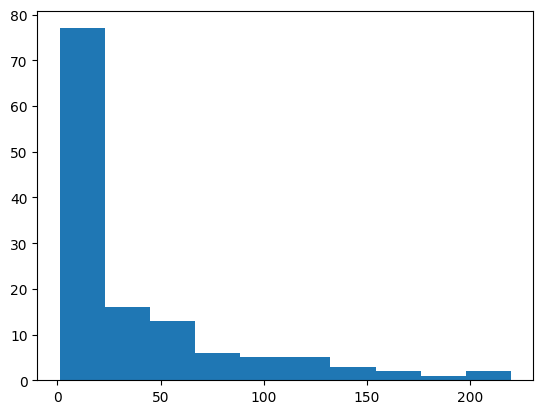

In [7]:
plt.hist(rice_consumption["co2_emission"])
plt.show()

In [8]:
print(rice_consumption["co2_emission"].agg([np.mean, np.median]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_18448\3559306660.py:1: FutureWarning: The provided callable <function mean at 0x000001CAFF980A40> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(rice_consumption["co2_emission"].agg([np.mean, np.median]))
C:\Users\DELL\AppData\Local\Temp\ipykernel_18448\3559306660.py:1: FutureWarning: The provided callable <function median at 0x000001CAFFAD2520> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  print(rice_consumption["co2_emission"].agg([np.mean, np.median]))


# Measure of spread
* set ddof = 1
* without ddof = 1, *var* caluculate **popultion** variance instead of **sample** variance

In [9]:
print(food_consumption.groupby("food_category")["co2_emission"].agg([np.var, np.std]))

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


C:\Users\DELL\AppData\Local\Temp\ipykernel_18448\1864891675.py:1: FutureWarning: The provided callable <function var at 0x000001CAFF980CC0> is currently using SeriesGroupBy.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  print(food_consumption.groupby("food_category")["co2_emission"].agg([np.var, np.std]))
C:\Users\DELL\AppData\Local\Temp\ipykernel_18448\1864891675.py:1: FutureWarning: The provided callable <function std at 0x000001CAFF980B80> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  print(food_consumption.groupby("food_category")["co2_emission"].agg([np.var, np.std]))


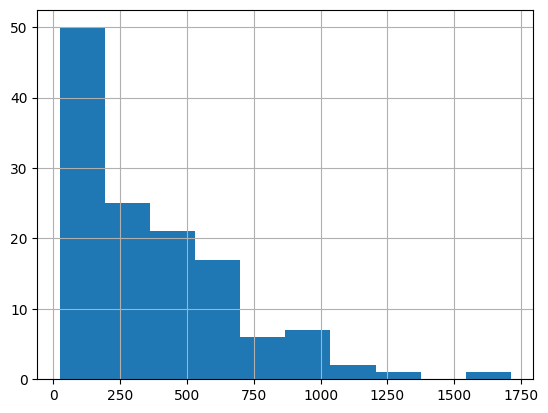

In [10]:
food_consumption[food_consumption["food_category"]=="beef"]["co2_emission"].hist()
plt.show()

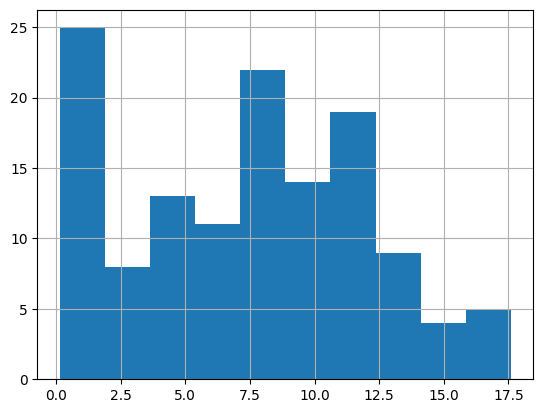

In [107]:
plt.figure()
food_consumption[food_consumption["food_category"]=="eggs"]["co2_emission"].hist()
plt.show()

In [11]:
print(np.quantile(food_consumption["co2_emission"], 0.25))

5.21


In [12]:
print(np.quantile(food_consumption["co2_emission"], [0, 0.25, 0.5, 0.75, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]


In [13]:
print(np.quantile(food_consumption["co2_emission"], [0, 0.20, 0.40, 0.60, 0.80, 1]))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [14]:
print(np.quantile(food_consumption["co2_emission"], [0, 0.10, 0.20, 0.30, 0.40, .50, .60, .70, .80, .90, 1]))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


In [16]:
emission_by_country = food_consumption.groupby('country')["co2_emission"].agg('sum')
emission_by_country

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64

In [17]:
from scipy.stats import iqr
iqr(emission_by_country)

np.float64(664.4925000000001)

In [18]:
q1 = np.quantile(emission_by_country, 0.25)
q3 = np.quantile(emission_by_country, 0.75)
iqr = q3-q1
print(iqr)

664.4925000000001


In [19]:
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

In [20]:
outliers = emission_by_country[(emission_by_country > upper) | (emission_by_country < lower)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


In [22]:
amir_deals = pd.read_csv("data/amir_deals.csv", index_col=0)
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [23]:
amir_deals["product"].value_counts()

product
Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: count, dtype: int64

In [24]:
probs = amir_deals["product"].value_counts()/len(amir_deals)
print(probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64


In [25]:
np.random.seed(24)

In [26]:
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

       product   client status   amount  num_users
128  Product B  Current    Won  2070.25          7
149  Product D  Current    Won  3485.48         52
78   Product B  Current    Won  6252.30         27
105  Product D  Current    Won  4110.98         39
167  Product C      New   Lost  3779.86         11


In [27]:
sample_with_replacement = amir_deals.sample(n=5, replace=True)
print(sample_with_replacement)

       product   client status   amount  num_users
134  Product D  Current    Won  5992.86         98
102  Product H  Current    Won  5116.34         63
111  Product B  Current    Won   696.88         44
50   Product B  Current    Won  3488.36         79
57   Product D  Current    Won  6820.84         42


In [28]:
group = {
    "group_id":["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"],
    "group_size":[2, 4, 6, 2, 2, 2, 3, 2, 4, 2]
}

In [29]:
restaurant_groups = pd.DataFrame(group)
restaurant_groups

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2
5,F,2
6,G,3
7,H,2
8,I,4
9,J,2


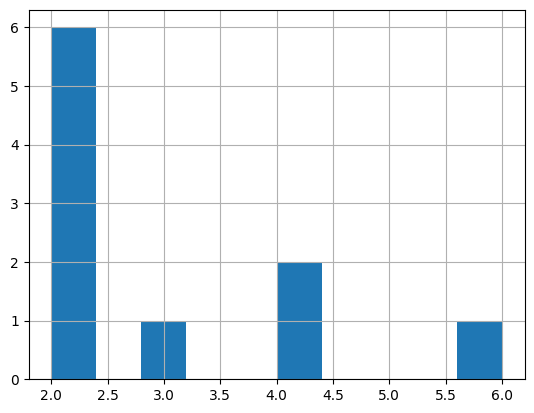

In [30]:
restaurant_groups["group_size"].hist()
plt.show()

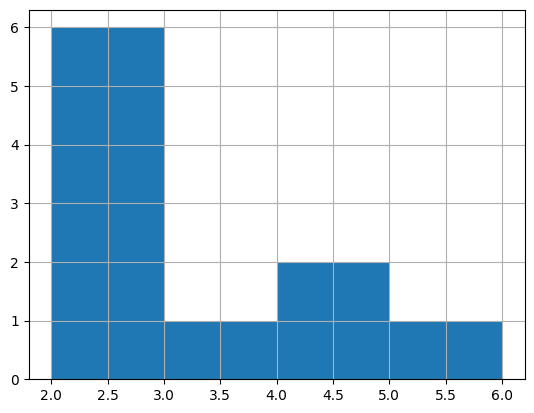

In [126]:
restaurant_groups["group_size"].hist(bins=[2, 3, 4, 5, 6])
plt.show()

In [31]:
size_dist = restaurant_groups["group_size"]/len(restaurant_groups)
size_dist = size_dist.reset_index()
size_dist.columns = ["size_dist", " group_size"]
print(size_dist)

   size_dist   group_size
0          0          0.2
1          1          0.4
2          2          0.6
3          3          0.2
4          4          0.2
5          5          0.2
6          6          0.3
7          7          0.2
8          8          0.4
9          9          0.2


In [32]:
expected_value = np.sum(size_dist["size_dist"]*size_dist[" group_size"])
print(expected_value)

12.200000000000001


In [33]:
from scipy.stats import uniform
uniform.cdf(7, 0, 12)

np.float64(0.5833333333333334)

In [34]:
min_time = 0
max_time = 30

In [35]:
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)

0.16666666666666666


In [36]:
prob_greater_than_5 = 1 - uniform.cdf(5, min_time, max_time)
print(prob_greater_than_5)

0.8333333333333334


In [37]:
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)

0.3333333333333333


In [38]:
np.random.seed(334)
wait_times = uniform.rvs(min_time, max_time, size=1000)
print(wait_times)

[ 7.144097    0.97455866  3.72802787  5.11644319  8.70602482 24.69140099
 23.98012075  3.19592668 25.1985306  17.89048629 24.68695356 18.27160808
 22.85829011  0.12929581 15.67789664  2.3262095  15.79151771 21.90473557
 18.25817257 15.78657023 28.74328434  9.38971275 17.0010565   0.95433991
 15.96917606  2.16395679  8.903302   19.24982156  6.52414731 14.10185677
 27.86973455 14.38121016 28.59233824 13.17550521 22.96382405  2.52904371
  6.2163781   8.40217036  4.48079914 28.16365298 19.73302715  3.63959282
  1.74002295  1.5324219  26.97096908 29.37490861  4.71379092  6.44990488
  6.81999564 22.81302458 12.41563042 11.14591581  8.08043184 29.60574053
  3.24571518 19.66709277 13.38939302 29.56433707 24.84697258  6.249684
 15.07668579  5.27474477 27.27430815  2.42084219 27.88317515  0.81231424
  3.48564273 19.80738592  6.11128124 19.10323692  9.12156821 28.31696467
 20.80158047 17.0840986  26.59969632 28.38502685 20.75398728 11.73610958
 20.55950389 18.20349931  4.68857179 17.67638417 29.9

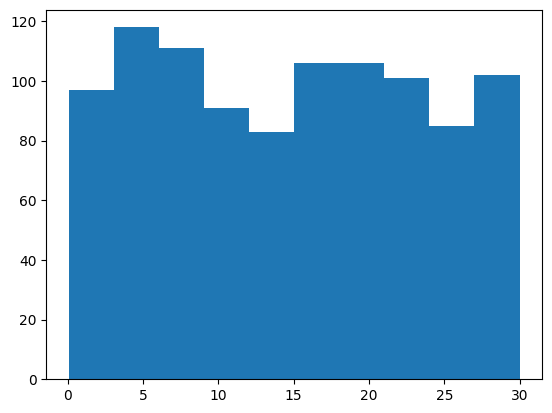

In [39]:

plt.hist(wait_times)
plt.show()

In [41]:
from scipy.stats import binom
np.random.seed(10)

In [42]:
print(binom.rvs(1, 0.3, size = 1))

[1]


In [43]:
print(binom.rvs(1, 0.3, size=3))

[0 0 1]


In [44]:
deals = binom.rvs(3, 0.3, size=52)
print(deals)

[1 0 0 1 0 0 1 2 0 1 2 1 1 0 2 1 1 0 1 1 1 1 1 1 1 1 2 1 2 0 0 0 0 2 0 1 1
 2 0 2 1 1 0 2 0 0 1 0 2 0 1 2]


In [45]:
prob_3 = binom.pmf(3, 3, 0.3)
print(prob_3)

0.026999999999999996


In [46]:
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)
print(prob_less_than_or_equal_1)

0.784


In [47]:
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)
print(prob_greater_than_1)

0.21599999999999997


In [48]:
won_30pct = 3 * 0.3
print(won_30pct)
won_25pct = 3*0.25
print(won_25pct)
won_35pct = 3*0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


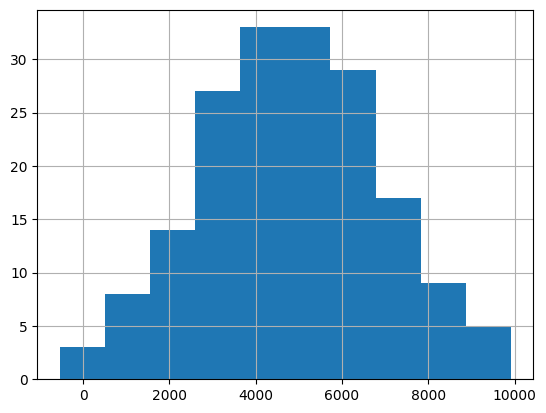

In [49]:
from scipy.stats import norm
amir_deals["amount"].hist(bins = 10)
plt.show()

In [50]:
amir_deals["amount"]

1      7389.52
2      4493.01
3      5738.09
4      2591.24
5      6622.97
        ...   
174    5835.32
175    6377.50
176    3537.61
177    6448.07
178    7320.05
Name: amount, Length: 178, dtype: float64

In [ ]:
prob_less_7500 = norm.cdf(7500, 5000, 2000)
print(prob_less_7500)

0.8943502263331446


In [52]:
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)
print(prob_over_1000)

0.9772498680518208


In [53]:
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

print(prob_3000_to_7000)

0.6826894921370859


In [54]:
pct_25 = norm.ppf(0.25, 5000, 2000)
print(pct_25)

3651.0204996078364


In [55]:
new_mean = 5000 + 0.20*5000
new_sd = 2000 + 0.30*2000

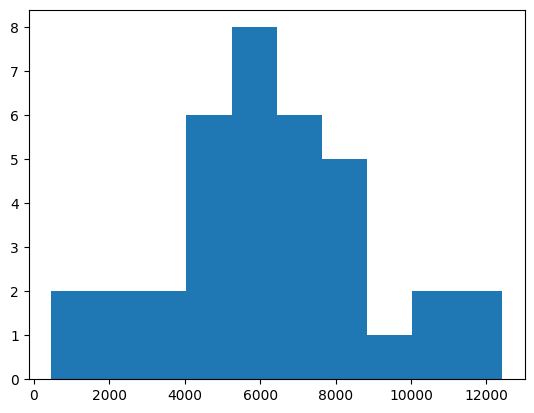

In [56]:
new_sales = norm.rvs(new_mean, new_sd, size=36)
plt.hist(new_sales)
plt.show()

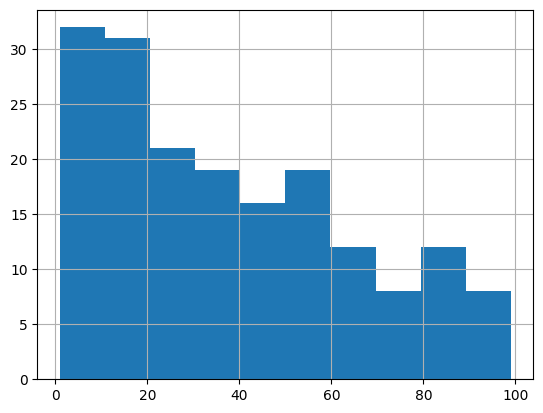

In [57]:
amir_deals["num_users"].hist()
plt.show()

In [58]:
np.random.seed(104)
samp_20 = amir_deals["num_users"].sample(n=20, replace=True)
print(np.mean(samp_20))

32.0


In [59]:
sample_means = []
for i in range(100):
    samp_20 = amir_deals["num_users"].sample(n=20, replace=True)
    samp_20_mean = np.mean(samp_20)
    sample_means.append(samp_20_mean)
print(sample_means)

[np.float64(31.35), np.float64(45.05), np.float64(33.55), np.float64(38.15), np.float64(50.85), np.float64(31.85), np.float64(34.65), np.float64(36.25), np.float64(38.9), np.float64(44.05), np.float64(35.45), np.float64(37.6), np.float64(37.95), np.float64(28.85), np.float64(33.3), np.float64(31.65), np.float64(45.5), np.float64(43.2), np.float64(24.4), np.float64(41.05), np.float64(37.2), np.float64(39.3), np.float64(29.45), np.float64(33.55), np.float64(45.3), np.float64(45.1), np.float64(30.95), np.float64(36.25), np.float64(37.65), np.float64(42.55), np.float64(34.55), np.float64(41.1), np.float64(36.9), np.float64(42.45), np.float64(38.45), np.float64(45.9), np.float64(42.7), np.float64(38.4), np.float64(32.55), np.float64(30.25), np.float64(38.0), np.float64(38.75), np.float64(49.3), np.float64(39.55), np.float64(49.05), np.float64(42.05), np.float64(41.0), np.float64(40.6), np.float64(58.25), np.float64(34.55), np.float64(51.2), np.float64(34.15), np.float64(36.95), np.float64(4

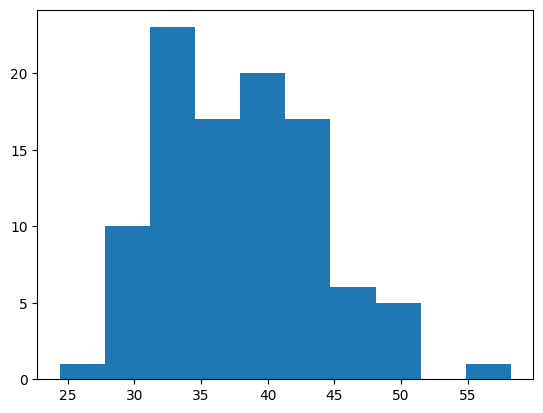

In [60]:
sample_means_Series = pd.Series(sample_means)
plt.hist(sample_means_Series)
plt.show()

In [61]:

from scipy.stats import poisson
prob_5 = poisson.pmf(5, 4)
print(prob_5)

0.1562934518505317


In [62]:
prob_coworker = poisson.pmf(5, 5.5)
print(prob_coworker)

0.17140068409793663


In [63]:
prob_2_or_less = poisson.cdf(2, 4)
print(prob_2_or_less)

0.23810330555354436


In [64]:
prob_over_10 = 1 - poisson.cdf(10, 4)
print(prob_over_10)

0.0028397661205137315


In [65]:
from scipy.stats import expon
print(expon.pdf(4, scale = 2.5))

0.08075860719786215


In [66]:
world_happiness = pd.read_csv("data/world_happiness.csv", index_col=0)
world_happiness.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


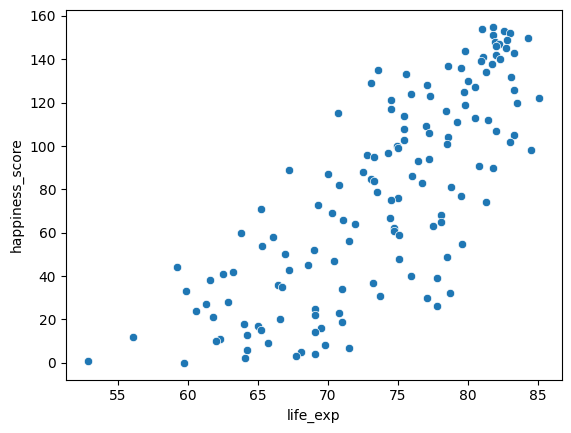

In [67]:
import seaborn as sns
sns.scatterplot(y='happiness_score', x='life_exp', data=world_happiness)
plt.show()

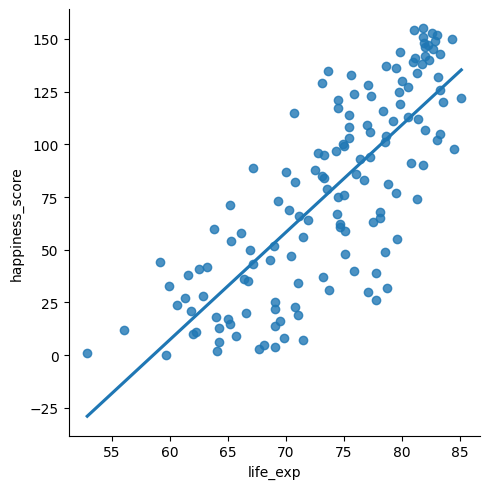

In [68]:
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)
plt.show()

In [69]:
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])
print(cor)

0.7802249053272062


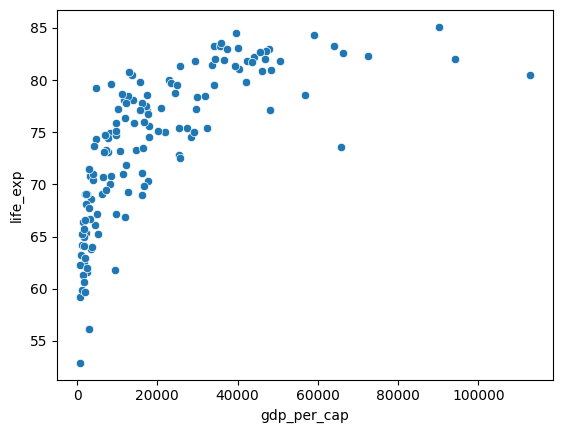

In [70]:
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)
plt.show()

In [71]:
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])
print(cor)

0.7019547642148015


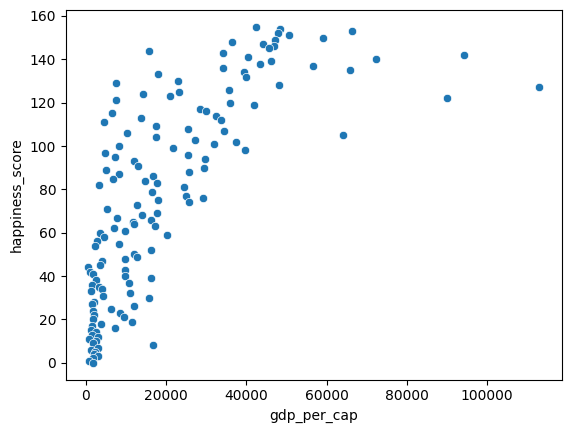

In [72]:
sns.scatterplot(x='gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

In [73]:
cor = world_happiness['gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

0.7279733012222975


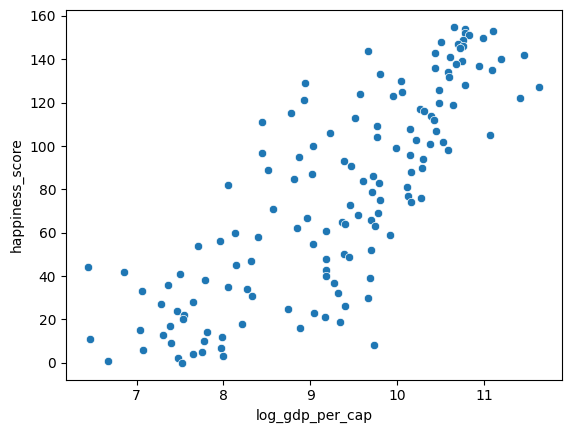

In [74]:
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])
sns.scatterplot(x='log_gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

In [75]:
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

0.8043146004918288
